Mirar que e grafo es conexo. Camino mínimo no puede ser mayor que N-1 porque es el máximo del camino caracteçristico. . 

for i in range in a

Hacer dos dimensiones y que calcule la media de cada columna. 

Printear L y C separado. 

def L_C_Aleatorio(n_graph,n,p):
    mu_C = 0
    mu_L = 0
    mu_orden = 0
    for i in range(n_graph):
        G = nx.gnp_random_graph(n, p)
        C = nx.average_clustering(G)
        orden = max(nx.connected_component_subgraphs(G) , key = len).order()
        if nx.is_connected(G):
            L = nx.average_shortest_path_length(G)
        else:
            L = n-1
        mu_C += C/n_graph
        mu_L += L/n_graph
        mu_orden += orden / n_graph
        
    return mu_L, mu_C, mu_orden

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Estudiar las propiedades de un grafo aleatorio

**a)** Usando la función gnp_random_graph(n,p) de NetworkX Implementad una rutina
Python L_C_Aleatorio que devuelva valor promedio de los coeficientes C (índice de
clusterización promedio) y L (camino característico) de un conjunto de n_graph grafos
aleatorios de n nodos y probabilidad p. El formato de la función debe ser

In [11]:
def L_C_Aleatorio(n_graph,n,p):
    mu_C = 0
    mu_L = 0
    for i in range(n_graph):
        G = nx.gnp_random_graph(n, p)
        C = nx.average_clustering(G)
        if nx.is_connected(G):
            L = nx.average_shortest_path_length(G)
        else:
            L = n-1
        mu_C += C/n_graph
        mu_L += L/n_graph
        
    return mu_L, mu_C
            

In [36]:
n = 400
n_graph = 20
ar_p = np.array([0,0.0001,0.0003,0.0006, 0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.])

ar_C = np.zeros(len(ar_p))
ar_L = np.zeros(len(ar_p))

for i, p in enumerate(ar_p):
    ar_L[i], ar_C[i] = L_C_Aleatorio(n_graph,n,p)

KeyboardInterrupt: 

In [ ]:
print(ar_L, ar_C)

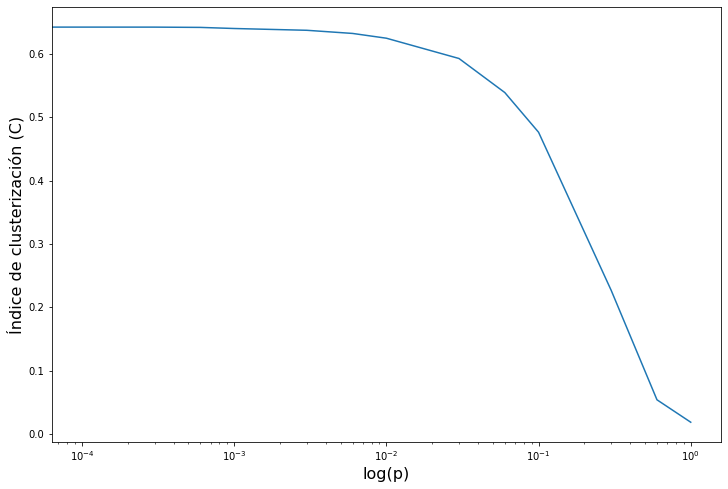

In [32]:
plt.figure(figsize = (12, 8))
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Índice de clusterización (C)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.plot(ar_p, ar_C)

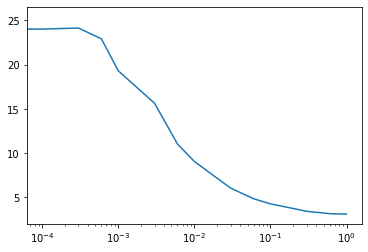

In [34]:
plt.plot(ar_p, ar_L)
plt.xscale("log", nonposx = 'clip')

El camino característico se mantiene en (N-1) porque todavía no es conexo y el camino es infinito. No obstante, cuando empieza a ser conexo el camino caracteŕistico cae. 

La p crítica es 0.25. 

Tiene sentido que en ambas gráficas caiga en ese punto, porque a medida que crece la C el camino característico entre nodos disminuye pues están más conectados

Para un grafo aleatorio, Erdos y Renyi demostraron que la estructura de clusters de un grafo cambia abruptamente cuando $<k>$ se acerca a $1$. 

Por un lado, tenemos que $<k> = \frac{2|E|}{|V|}$ y $ |E| = p\frac{|V|(|V|-1)}{2} \;.$

Luego, despejando de las dos ecuaciones anteriores:

$$<k> \simeq p|V|$$

La probabilidad crítica será por tanto:

$$ p_c|V| \simeq 1 \rightarrow p_c \simeq \frac{1}{|V|} \;.$$

# Apartado 2

In [19]:
def L_C_Small_World(n_graph,n,k,p):
    mu_C = 0
    mu_L = 0
    for i in range(n_graph):
        G = nx.watts_strogatz_graph(n, k, p)
        C = nx.average_clustering(G)
        if nx.is_connected(G):
            L = nx.average_shortest_path_length(G)
        else:
            L = n-1
        mu_C += C/n_graph
        mu_L += L/n_graph
        
    return mu_L, mu_C

In [24]:
n = 400
n_graph = 20
k = 8
ar_p = np.array([0,0.0001,0.0003,0.0006, 0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.])

ar_C = np.zeros(len(ar_p))
ar_L = np.zeros(len(ar_p))

for i, p in enumerate(ar_p):
    ar_L[i], ar_C[i] = L_C_Small_World(n_graph, n, k, p)

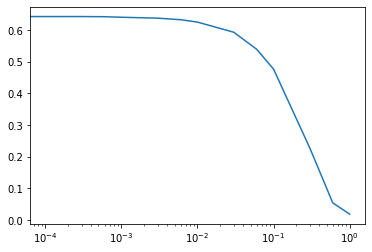

In [25]:
plt.plot(ar_p, ar_C)
plt.xscale("log", nonposx = 'clip')

A medida que vas aumentando la probabilidad de reconectar una arista observamos que el índice de clusterización disminuye. En un watts los nodos se unen con sus k vecinos, a medida que se reconectan aristas esta propiedad se diluye y el índice se comporta en mayor medida como un grafo aleatorio. 

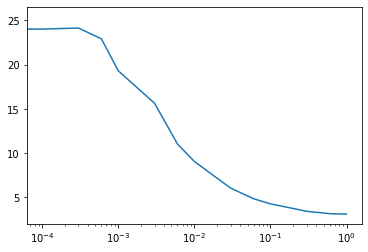

In [27]:
plt.plot(ar_p, ar_L)
plt.xscale("log", nonposx = 'clip')

Para un grafo de mundo pequeño se comprueba que el cambio característico disminuye bruscamente (cambio de régimen): 

$$p = \frac{1}{kN} $$ 

# Apartado 3

In [ ]:
n = 10000
m = 10
G_BA = nx.barabasi_albert_graph(n, m)

C = nx.average_clustering(G_BA)
L = nx.average_shortest_path_length(G_BA)


In [ ]:
L=nx.degree_histogram(G_BA)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
print(np.mean(list(dict(nx.degree(G_le)).values())))

In [ ]:
plt.plot(range(len(L)),L, color='b')
plt.title("Degree Histogram")
plt.ylabel("log(Count)")
plt.xlabel("log(Degree)")
plt.xscale("log", nonposx = 'clip')
plt.yscale("log", nonposy = 'clip')
plt.show()

In [ ]:
# Vemos el numero de ramas que tiene el grafo barabasi 
G_AL = nx.gnm_random_graph(n, n*m) # n*m es el numero de ramas 

C = nx.average_clustering(G_BA)
L = nx.average_shortest_path_length(G_BA)

# para reutilizar la función L_AL hay que transformar el n*m = E a la p que genera esa E. 

In [ ]:
n_graph = 20
ar_C = np.zeros(len(n_graph)) 
ar_L = np.zeros(len(n_graph)) 
    
L_C_Aleatorio(n_graph,n,p)

$|E| = p\frac{|V|(|V|-1)}{2} \rightarrow p = \frac{2|E|}{|V|(|V|-1)} = 0.2$ 